# Project: Investigate a Dataset (No Show appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **No Show up Dataset**: This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.  
> The dataset was downloaded from [here](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv)  
> **`Analysis Goal`**: to find what factors are related for no show up and what factors can make us predict that the patient will show or not. 

In [1]:
# importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **The purpose of this section**: In this stage we are going to load the data and inspect the columns and make the necessary cleaning and filtering for the data in order to be ready for our analysis.

In [2]:
# Load data and inspect its variables
df_main = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [3]:
df_main.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df_main.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


We notice from the info that there is no missing data and all columns are filled, however we need to make in depth investigation for each column values to ensure their validity.

### <u>**What needs to be done:**</u>  
* **Check duplicates** > should be checked for any column repetition.
* **Columns names are uppercase** > should be lowercase, fix dash in no-show column name.
* **Age has minimum of -1** which is not considered accurate > should be fixed with the proper values.
* **No show column**: `Yes` means did not show - `No` means showed and attended > this should be fixed to avoid confusion.
* **Dates are stored as string** > should be converted to the right format.
* **Add a new column** to calculate the difference between the schedule date and appointment date.
* **Delete uncessary columns** patientid, appointmentid.

### Data Cleaning (fixing columns names and delete some unnecessary columns)

In [5]:
# checking for duplicates
df_main[df_main.duplicated()].shape

(0, 14)

**No duplicates found!**

In [6]:
# columns names to lower case
df_main.columns = df_main.columns.str.lower()

In [7]:
#fix dash in no-show column name
df_main.rename(columns={'no-show':'show'}, inplace=True)

In [8]:
# investigating age
df_main['age'][df_main['age']<=0].value_counts()

 0    3539
-1       1
Name: age, dtype: int64

we have 3540 entry which their age is missing

In [9]:
# The mean age for males and females
df_main.groupby('gender')['age'].mean()

gender
F    38.893987
M    33.736863
Name: age, dtype: float64

#### This is the age including the 0 and -1 values as shown above, so we will calculate it based on the right ages which are bigger than 0.

In [10]:
# age statistics
df_main.age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

### We can notice that the standard variation value is high, which means our dataset has a wide range of values
#### **In This case, it will be misleading to take the average (mean) of values and it is better to use median as a less misleading value.**

In [11]:
# replacing age values of zero or less with nan to fill them later
df_main.loc[df_main['age']<=0,['age']] = np.nan

In [12]:
# The median age for males and females
df_main.groupby('gender')['age'].median()

gender
F    39.0
M    35.0
Name: age, dtype: float64

In [13]:
# we get the mean of the values that bigger than 0
real_mean = df_main[df_main['age'].notnull()].groupby('gender')['age'].median()
real_mean

gender
F    39.0
M    35.0
Name: age, dtype: float64

#### The difference around 3 years for males between the mean and median.

In [14]:
# filling nan values with the real mean
df_main.loc[(df_main['gender']=='F') & (pd.isnull(df_main['age'])),['age']] =real_mean[0]
df_main.loc[(df_main['gender']=='M') & (pd.isnull(df_main['age'])),['age']] =real_mean[1]

In [15]:
# checking age again
df_main['age'].describe()

count    110527.000000
mean         38.272196
std          22.107717
min           1.000000
25%          20.000000
50%          38.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [16]:
# checking the results of the changes
df_main.groupby('gender')['age'].mean()

gender
F    39.828828
M    35.381601
Name: age, dtype: float64

In [17]:
# fixing the show column values
df_main['show'] = df_main['show'].replace('Yes',0).replace("No",1)
df_main['show'] = df_main['show'].replace(0,"No Show").replace(1,'Show')

In [18]:
df_main.show.unique()

array(['Show', 'No Show'], dtype=object)

In [19]:
# converting The dates columns to the proper type
df_main['scheduledday'] = pd.to_datetime(df_main['scheduledday'])
df_main['appointmentday'] = pd.to_datetime(df_main['appointmentday'])

In [20]:
# creating dates difference to include the period between them in out analysis
df_main['dates_diff'] = df_main['appointmentday'] - df_main['scheduledday']

In [21]:
# checking dates diff 
df_main['dates_diff'].head(), df_main['dates_diff'].describe()

(0   -1 days +05:21:52
 1   -1 days +07:51:33
 2   -1 days +07:40:56
 3   -1 days +06:30:29
 4   -1 days +07:52:37
 Name: dates_diff, dtype: timedelta64[ns], count                      110527
 mean       9 days 17:08:34.161960
 std       15 days 05:51:27.891504
 min             -7 days +10:10:40
 25%      -1 days +15:41:31.500000
 50%               3 days 11:22:18
 75%       14 days 07:41:34.500000
 max             178 days 13:19:01
 Name: dates_diff, dtype: object)

### In order to make the best use of these numbers of dates diff, we will convert them into sucategories

In [22]:
# we will try this on a separate dataframe before making it on our main dataframe
df_cut_dates_diff = pd.cut(df_main['dates_diff'].dt.days,[-8,0,7,14,30,60,180],labels=['same day or before','one week','two weeks','one month', 'two month','three month or more'])

In [23]:
# check the values
df_cut_dates_diff.describe(), df_cut_dates_diff.value_counts()

(count                 110527
 unique                     6
 top       same day or before
 freq                   43781
 Name: dates_diff, dtype: object, same day or before     43781
 one week               29304
 one month              16540
 two weeks              11196
 two month               7746
 three month or more     1960
 Name: dates_diff, dtype: int64)

In [24]:
# we create a new column to hold the ordinal data
df_main['date_diff_ord'] =  df_cut_dates_diff

#### Delete the unncessary columns

In [25]:
df_main.drop(['patientid','appointmentid'], axis=1, inplace=True)

In [26]:
# check deletion process
df_main.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show,dates_diff,date_diff_ord
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.0,JARDIM DA PENHA,0,1,0,0,0,0,Show,-1 days +05:21:52,same day or before
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,0,0,0,0,0,Show,-1 days +07:51:33,same day or before
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62.0,MATA DA PRAIA,0,0,0,0,0,0,Show,-1 days +07:40:56,same day or before
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,Show,-1 days +06:30:29,same day or before
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,1,1,0,0,0,Show,-1 days +07:52:37,same day or before


In [27]:
# ensuring that all changes were made correctly
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
gender            110527 non-null object
scheduledday      110527 non-null datetime64[ns, UTC]
appointmentday    110527 non-null datetime64[ns, UTC]
age               110527 non-null float64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hipertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handcap           110527 non-null int64
sms_received      110527 non-null int64
show              110527 non-null object
dates_diff        110527 non-null timedelta64[ns]
date_diff_ord     110527 non-null category
dtypes: category(1), datetime64[ns, UTC](2), float64(1), int64(6), object(3), timedelta64[ns](1)
memory usage: 11.1+ MB


### Now our data is ready for analysis 

<a id='eda'></a>
# Exploratory Data Analysis (General Exploration)

### <u>**What needs to be done in this stage:**</u>  
> * **Analyzing each variable** > should analyze each variable in our dataset in order to know our data more.</l>
> * **Analyze each feature (column) with the `show` data** > This stage is important to find relations between data.
> * **Analyze more than one feature (column) with the `show` data**> to find more interrelations between the features.

In [28]:
# print columns
df_main.columns

Index(['gender', 'scheduledday', 'appointmentday', 'age', 'neighbourhood',
       'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap',
       'sms_received', 'show', 'dates_diff', 'date_diff_ord'],
      dtype='object')

In [29]:
def counts_n_plots(list_cols,count_on_col,dataframe):
    """This function takes list of columns names in a dataframe
    The function returns the count of catgeorical variable, percentage and simple plot for percentage
    input 
    lst_cols: list of columns to explore and plot
    count_on_col: the column that we count on it, this is required to show the count
    data: the dataframe
    """
    # it loops through the list of columns
    for col in list_cols:
        # groups by the column and gets the count
        count_values = dataframe.groupby([col])[count_on_col].count() 
        # we print the count
        print(count_values) 
        # we divide the count on the number of rows of th df to get the percentages
        values_percent = count_values/len(dataframe)*100
        # prints percentages
        print(values_percent)
        # plots the percentages with the proper titles and labels
        values_percent.plot(kind='bar')
        plt.ylabel(col.title() + ' value percent %')
        plt.title("The percentage of each variable in "+ col + " column")
        plt.show()

In [30]:
# analysis based on columns
lst_columns = ['gender', 'scholarship', 'hipertension', 'diabetes',
               'alcoholism', 'handcap','sms_received', 'show','date_diff_ord']

gender
F    71840
M    38687
Name: show, dtype: int64
gender
F    64.997693
M    35.002307
Name: show, dtype: float64


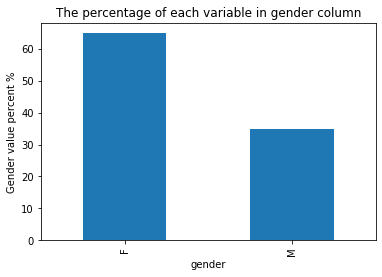

scholarship
0    99666
1    10861
Name: show, dtype: int64
scholarship
0    90.173442
1     9.826558
Name: show, dtype: float64


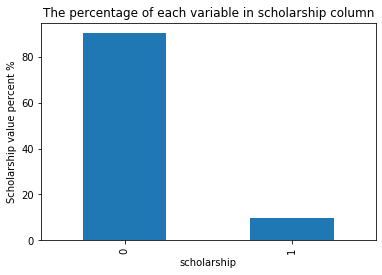

hipertension
0    88726
1    21801
Name: show, dtype: int64
hipertension
0    80.275408
1    19.724592
Name: show, dtype: float64


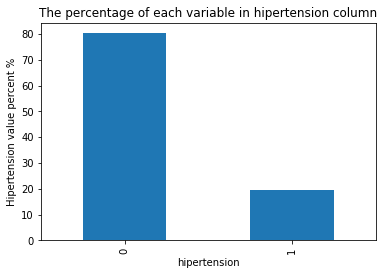

diabetes
0    102584
1      7943
Name: show, dtype: int64
diabetes
0    92.813521
1     7.186479
Name: show, dtype: float64


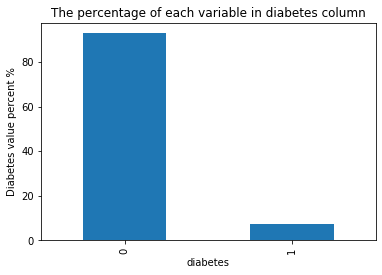

alcoholism
0    107167
1      3360
Name: show, dtype: int64
alcoholism
0    96.960019
1     3.039981
Name: show, dtype: float64


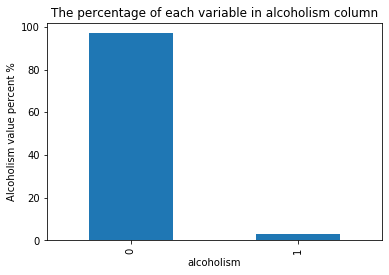

handcap
0    108286
1      2042
2       183
3        13
4         3
Name: show, dtype: int64
handcap
0    97.972441
1     1.847512
2     0.165570
3     0.011762
4     0.002714
Name: show, dtype: float64


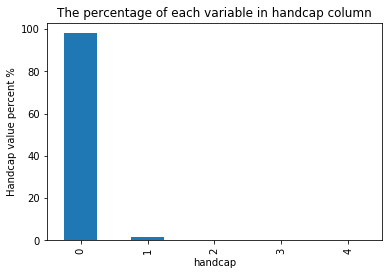

sms_received
0    75045
1    35482
Name: show, dtype: int64
sms_received
0    67.897437
1    32.102563
Name: show, dtype: float64


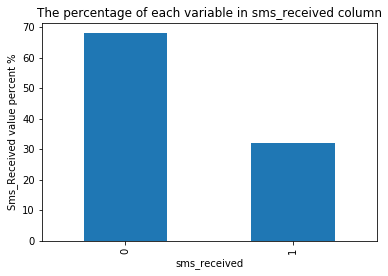

show
No Show    22319
Show       88208
Name: show, dtype: int64
show
No Show    20.193256
Show       79.806744
Name: show, dtype: float64


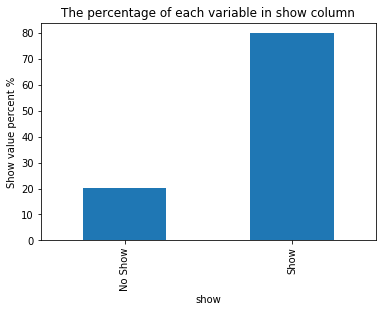

date_diff_ord
same day or before     43781
one week               29304
two weeks              11196
one month              16540
two month               7746
three month or more     1960
Name: show, dtype: int64
date_diff_ord
same day or before     39.611136
one week               26.512979
two weeks              10.129652
one month              14.964669
two month               7.008242
three month or more     1.773322
Name: show, dtype: float64


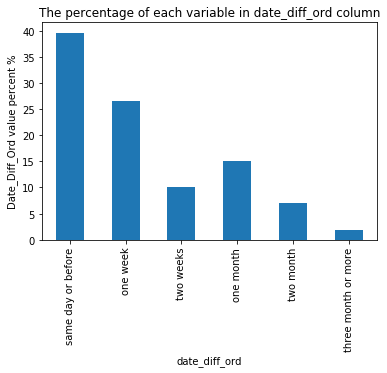

In [31]:
# showing counts and plots for categorical values
counts_n_plots(lst_columns,'show',df_main)

# <u>`Understaning Data`</u>

#### <u>Gender column:</u>  
**Most of our population is females.**
* **
#### <u>Scholarship column:</u>  
**Most of our population is not in the programme of "Project Family Grant" of the World Bank.**
* **
#### <u>Hipertension column:</u>  
**Most of our population does not suffer Hipertension.**
* **
#### <u>Diabetes column:</u>  
**Most of our population does not suffer Diabetes.**
* **
#### <u>Alcoholism column:</u>  
**Most of our population is not alcoholic.**
* **
#### <u>Handcap column:</u>  
**Most of our population is not handcapped.**
* **
#### <u>sms_received column:</u>  
**Most of our population did not receive a reminder SMS message.**
* **
#### <u>Show column:</u>  
**Most of our population showed up in their determined appointments.**
* **
#### <u>date_diff_ord column:</u>  
**Most of our population got their appointments within the first month.**

#### We investigate the other columns as well.

In [32]:
# age mean
df_main['age'].describe()

count    110527.000000
mean         38.272196
std          22.107717
min           1.000000
25%          20.000000
50%          38.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

Text(0.5, 1.0, 'age histogram')

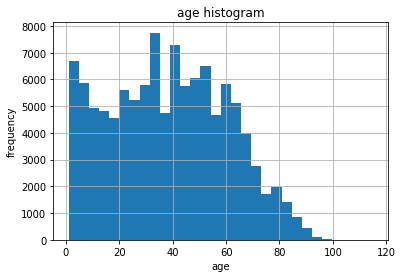

In [33]:
# age histogram
df_main['age'].hist(bins=30)
plt.xlabel('age')
plt.ylabel('frequency')
plt.title('age histogram')

#### From the age histogram we notice three age groups 
* 1 - 20
* 21 - 60
* 61 - 100

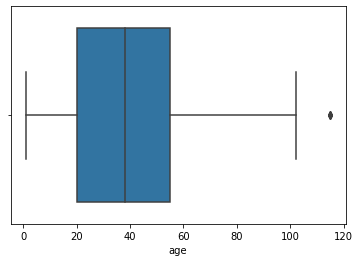

In [34]:
# boxplot to determine if there any outliers in our data
sns.boxplot(x='age', data=df_main)

#### <I>From the age statistic above we can make some observations</I>
* The average is 38 years.
* The standard deviation is 22 which is considered quite high and means that there is a wide range of values.
* The min is 1 year and max is 115 years.
* The IQR is 35.

Text(0.5, 1.0, 'dates difference histogram')

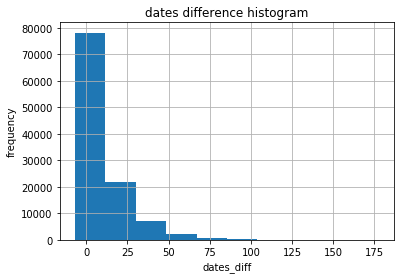

In [35]:
# ivestigating dates differrence
df_main['dates_diff'].dt.days.sort_values().hist()
plt.xlabel('dates_diff')
plt.ylabel('frequency')
plt.title('dates difference histogram')

In [36]:
# checking the correlation between columns
df_main.corr()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
age,1.000000,-0.111668,0.500935,0.290756,0.090678,0.074299,0.005493
scholarship,-0.111668,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194
hipertension,0.500935,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267
diabetes,0.290756,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550
alcoholism,0.090678,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147
handcap,0.074299,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161
sms_received,0.005493,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000


#### From the previous table of correlation we find that there is a moderate relation between age and hipertension. However, our main purpose is to find the factors related to patients showing or not showing up.

## Research Question 1  (What are the factors that affect show or no show)

### We built a function to explore the data in a better way
**So, Instead of using numbers, we can use the percentages to understand how the population is acting**

In [37]:
def values_percent(grp_col, agg_col, df):
    """This function gets the percentage of columns count by groupby method
    input: col name - can accept list of columns 
    agg_col: a column to count on it, just for counting purpose but will not affect the final values
    df: is the data frame
    returns: the percentage of the values count and their plot
    """
    percent = np.round((df.groupby(grp_col)[agg_col].count() / len(df))*100,1)
    # prints values and return them
    print(percent)
    return percent

show     scholarship
No Show  0              17.9
         1               2.3
Show     0              72.3
         1               7.5
Name: age, dtype: float64


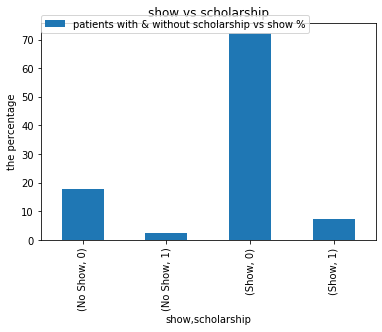

In [38]:
# we investigate the relation between show and scholarship
values_percent(['show','scholarship'],'age',df_main).plot(kind='bar').plot(kind='bar',figsize=(8,5))
plt.title("show vs scholarship")
plt.ylabel('the percentage')
plt.legend(['patients with & without scholarship vs show %'],loc=[0,0.95])

we notice that most patients their percentage is low in comparison with the whole population. **Thus, this factor does not have a significant effect on showing up.**

show     hipertension
No Show  0               16.8
         1                3.4
Show     0               63.5
         1               16.3
Name: age, dtype: float64


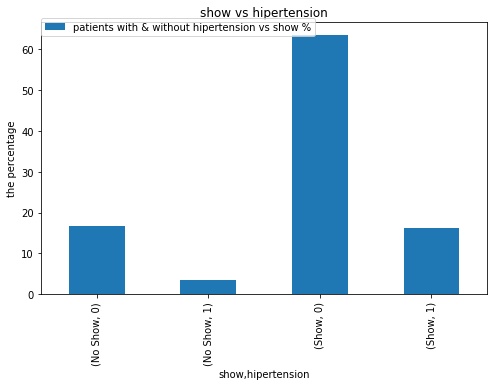

In [39]:
# we investigate the relation between show and hipertension
values_percent(['show', 'hipertension'],'age',df_main).plot(kind='bar',figsize=(8,5))
plt.title("show vs hipertension")
plt.ylabel('the percentage')
plt.legend(['patients with & without hipertension vs show %'],loc=[0,0.95])

we notice that patients with `hipertenstion` tend to show more than the one that do not suffer from it. **This factor should be considered when evaluating all factors that make patients show up**

show     alcoholism
No Show  0             19.6
         1              0.6
Show     0             77.4
         1              2.4
Name: age, dtype: float64


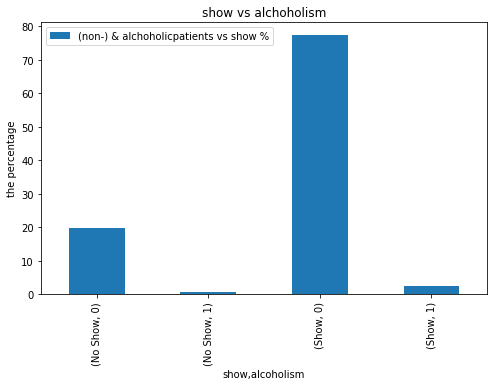

In [40]:
# we investigate the relation between show and alcoholism
values_percent(['show', 'alcoholism'],'age',df_main).plot(kind='bar',figsize=(8,5))
plt.title("show vs alchoholism")
plt.ylabel('the percentage')
plt.legend(['(non-) & alchoholicpatients vs show %'])

we notice that most patients are not `alchoholic` and the percentage alchoholic patients is exteremly low in comparison with the whole population. **However, this factor does not have a significant effect on showing up, but ituld be considered**

show     diabetes
No Show  0           18.9
         1            1.3
Show     0           73.9
         1            5.9
Name: age, dtype: float64


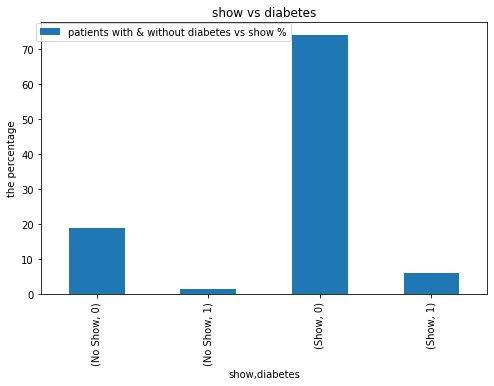

In [41]:
# we investigate the relation between show and diabetes
values_percent(['show', 'diabetes'],'age',df_main).plot(kind='bar',figsize=(8,5))
plt.title("show vs diabetes")
plt.ylabel('the percentage')
plt.legend(['patients with & without diabetes vs show %'], loc=[-0.01,0.93])

we notice that patients with `diabetes` tend to show more than the one that do not suffer from it. **This factor should be considered when evaluating all factors that make patients show up**

show     sms_received
No Show  0               11.3
         1                8.9
Show     0               56.6
         1               23.3
Name: age, dtype: float64


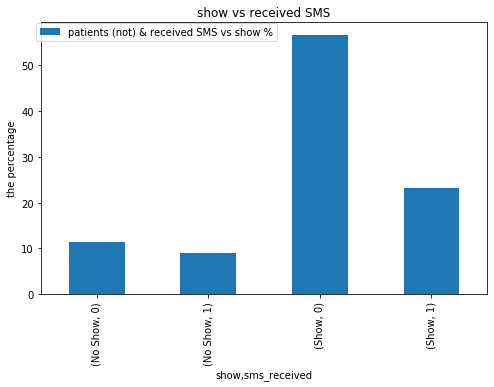

In [42]:
# we investigate the relation between show and sms_received
values_percent(['show', 'sms_received'],'age',df_main).plot(kind='bar',figsize=(8,5))
plt.title("show vs received SMS")
plt.ylabel('the percentage')
plt.legend(['patients (not) & received SMS vs show %'], loc=[-0.01,0.93])

we notice that patients that did not receive `SMS` tend to show in similar rates as the ones who did not receive. **This factor should not be considered when evaluating all factors that make patients show up**

show     handcap
No Show  0          19.8
         1           0.3
         2           0.0
         3           0.0
         4           0.0
Show     0          78.1
         1           1.5
         2           0.1
         3           0.0
         4           0.0
Name: age, dtype: float64


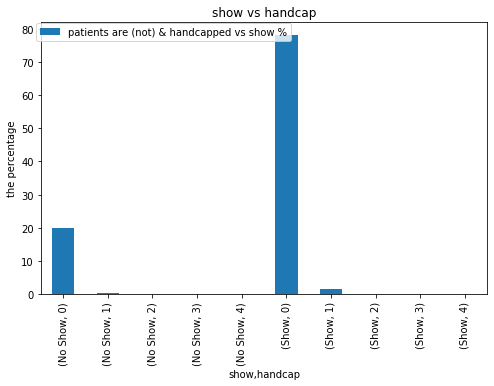

In [43]:
# we investigate the relation between show and handcap
values_percent(['show', 'handcap'],'age',df_main).plot(kind='bar',figsize=(8,5))
plt.title("show vs handcap")
plt.ylabel('the percentage')
plt.legend(['patients are (not) & handcapped vs show %'], loc=[-0.01,0.93])

despite the fact that the handcapped patients represent a very low number, but their show is higher than their non show rate

show     date_diff_ord      
No Show  same day or before      2.6
         one week                6.6
         two weeks               3.2
         one month               4.9
         two month               2.4
         three month or more     0.5
Show     same day or before     37.0
         one week               19.9
         two weeks               7.0
         one month              10.1
         two month               4.6
         three month or more     1.3
Name: age, dtype: float64


Text(0.5, 1.0, 'The show percentage based on the time between schedule date and appointment date')

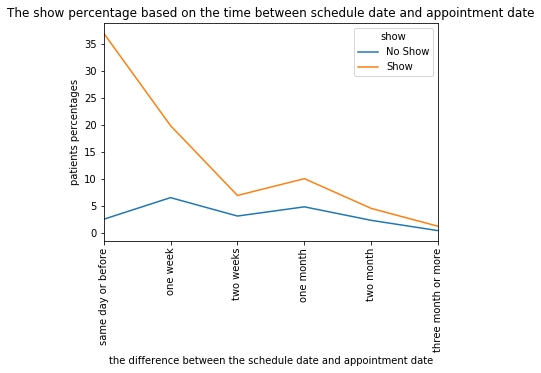

In [44]:
# we investigate the relation between show and date_diff_ord
values_percent(['show','date_diff_ord'],'age',df_main).unstack(level=0).plot(rot=90)
plt.ylabel('patients percentages')
plt.xlabel('the difference between the schedule date and appointment date')
plt.title("The show percentage based on the time between schedule date and appointment date")

We can see in the previous plot that patients tend to show if their appointment was in the same month and after one month their show up rate gets less

### After exploring individual columns with show columns now we investigate more than two columns

show     hipertension  diabetes
No Show  0             0           16.5
                       1            0.3
         1             0            2.4
                       1            1.0
Show     0             0           62.4
                       1            1.1
         1             0           11.5
                       1            4.8
Name: age, dtype: float64


Text(0, 0.5, 'the percentage')

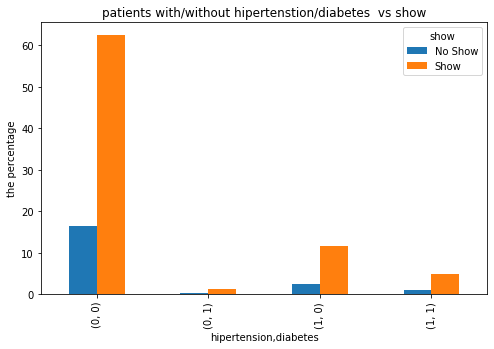

In [45]:
# we investigate the relation between show and hipertenstion/diabetes
values_percent(['show','hipertension','diabetes'],'age',df_main).unstack(level=[0]).plot(kind='bar',figsize=(8,5))
plt.title("patients with/without hipertenstion/diabetes  vs show")
plt.ylabel('the percentage')

**we notice that patients with hipertentsion or/and diabetes have higher show up**
#### we can make sure of this by making a column for patients score based on their hipertenstion, diabetes and alcholism score

In [46]:
# creating a column that has the total score of these columns
df_main['total_score'] = df_main['diabetes'] + df_main['alcoholism'] + df_main['hipertension']

In [47]:
# checking the created column
df_main['total_score'].value_counts()

0    85312
1    17582
2     7377
3      256
Name: total_score, dtype: int64

show     total_score
No Show  0              16.1
         1               2.8
         2               1.2
         3               0.0
Show     0              61.0
         1              13.1
         2               5.5
         3               0.2
Name: age, dtype: float64


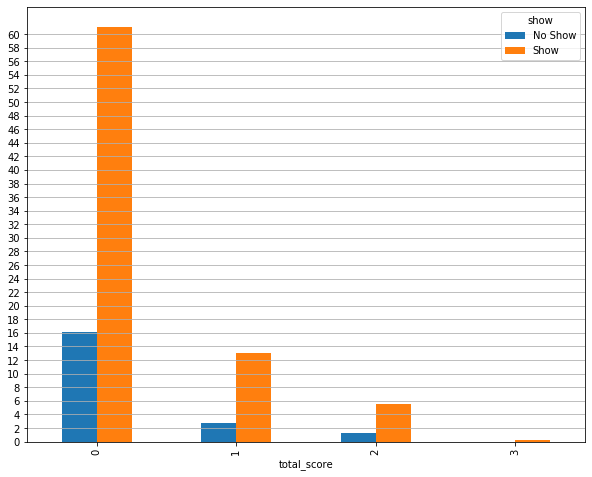

In [48]:
# plotting the column vs show percentage
values_percent(['show','total_score'],'age',df_main).unstack(level=[0]).plot(kind='bar',yticks=range(0,61,2), figsize=(10,8))
plt.grid(axis='y')

### We notice from the plot that we have four groups:
* **First**: patients with no diabetes/hipertension and not alchoholic and they are the vast majority.  
* **Second**: patients with hiperetension or diabtes or alchoholic.   
* **Third**: patients with diabetes and achoholic; or hipertenstion and acholholic; or diabtets and hipertenstion.  
* **Fourth**: patients that they have diabetes, hipertension and alchoholic.  

### We can see that the `fourth` group has never missed an appointment and they always showed up.

#### <u>we can plot the no show up percentage as follows:</u>  
**(no show number / total number of the group) * 100**

In [49]:
# calculating no show up percentage vs group number
df_noshow_perc = values_percent(['show','total_score'],'age',df_main).unstack(level=[0])

show     total_score
No Show  0              16.1
         1               2.8
         2               1.2
         3               0.0
Show     0              61.0
         1              13.1
         2               5.5
         3               0.2
Name: age, dtype: float64


In [50]:
# applying the calculation on the dataframe
df_noshow_perc['no_show_percent'] = df_noshow_perc['No Show'] / (df_noshow_perc['No Show'] + df_noshow_perc['Show']) *100

Text(0.5, 1.0, 'No show up percentages of the four groups')

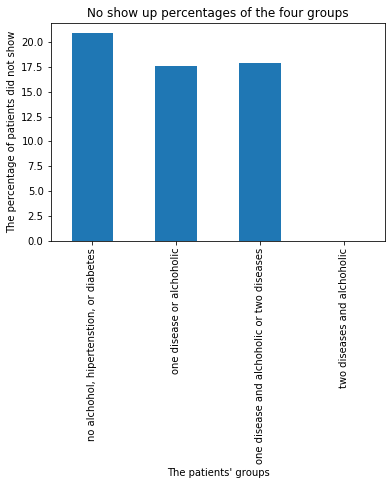

In [51]:
ax = plt.axes()
# creating the proper plot with its labels and titles
df_noshow_perc.no_show_percent.plot(kind='bar')
plt.xticks(range(0,4,1))
ax.set_xticklabels(['no alchohol, hipertenstion, or diabetes','one disease or alchoholic','one disease and alchoholic or two diseases', 'two diseases and alchoholic'])
ax.set_ylabel('The percentage of patients did not show')
ax.set_xlabel("The patients' groups")
plt.title("No show up percentages of the four groups")

<a id='conclusions'></a>
# Conclusions
> **1- Patients that have more diseases tend to show up more than healthier ones.  
2- We can predict patients show up based on diseases and the diference between the shedule date and appointment date.  
3- These diseases are not enough to illustrate the high show up rate of patients that do not have these diseases, however patients with dieases and alchoholic are considered factors among other factors to show up.**